In this dataset we have 12 columns 

1_PassengerId	(personal information) 

2_Survived (Survived=1,not Survived=0)

3_Pclass there are three classes (1 = 1st, 2 = 2nd, 3 = 3rd)
	
4_Name (personal information) 

5_Sex (male,female)

6_Age	(Age in years)
  
7_SibSp  

         sibsp: The dataset defines family relations in this way...

         Sibling = brother, sister, stepbrother, stepsister

         Spouse = husband, wife (mistresses and fiancés were ignored)
  
8_Parch	 

         parch: The dataset defines family relations in this way...

         Parent = mother, father

         Child = daughter, son, stepdaughter, stepson

         Some children travelled only with a nanny, therefore parch=0 for them.
    
9_Ticket (Ticket number)
    
10_Fare	(Passenger fare 'price')
    
11_Cabin (Cabin number)
    
12_Embarked (Port of Embarkation where C = Cherbourg, Q = Queenstown,           S=Southampton)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data plotting 
import matplotlib.pyplot as plt # data plotting
from sklearn.preprocessing import StandardScaler # data processing, make data have same scale
from sklearn.preprocessing import OneHotEncoder # data processing,convert data to dummies variables
from sklearn.model_selection import GridSearchCV  # Search the best parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score # evaluating the model
from sklearn.ensemble import RandomForestClassifier  # import Random Forest model classifier
from sklearn.ensemble import ExtraTreesClassifier # import Extra Trees model classifier 
from sklearn.ensemble import VotingClassifier # import voting model classifier 
from sklearn.ensemble import BaggingClassifier # import Bagging model classifier 
from sklearn.ensemble import AdaBoostClassifier  # import AdaBoost model classifier 
from sklearn.ensemble import GradientBoostingClassifier  #import Gradient Boosting model classifier 
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV  # import Logistic Regression model classifier 
from sklearn.neighbors import KNeighborsClassifier # import K Nearest Neighbores model classifier 
from sklearn.tree import DecisionTreeClassifier # import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # import Gaussian Naive Bayes Classifier
from sklearn.svm import SVC # import suporrt vector machine moled Classifier 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_set = pd.read_csv("/kaggle/input/titanic/train.csv") 
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_set = pd.read_csv("/kaggle/input/titanic/test.csv")
test_set.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Explore the Data

In [5]:
print(f'number of rows in train set {train_set.shape[0]}')
print(f'number of columns in train set {train_set.shape[1]}')

number of rows in train set 891
number of columns in train set 12


In [6]:
#show Type of data
train_set.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#show descriptive statistic for float and int data
train_set.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#show descriptive statistic for object data
train_set.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
print(f'number of rows in test set {train_set.shape[0]}')
print(f'number of columns in test set {train_set.shape[1]}')

number of rows in test set 891
number of columns in test set 12


In [10]:
#show Type of data
test_set.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
#show descriptive statistic for float and int data
test_set.describe() 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
#show descriptive statistic for object data
test_set.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [13]:
# a better style for plotting
plt.style.use('ggplot')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


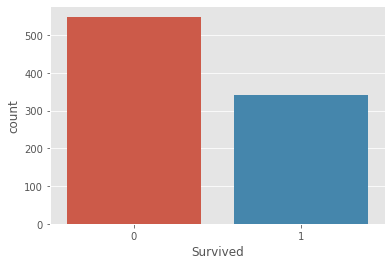

In [14]:
sns.countplot(train_set['Survived'],label='count');

In [15]:
idx = train_set.Survived.value_counts().index
val1 = train_set.Survived.value_counts().values
val2 = train_set.Survived.value_counts(normalize=True).values

d1 = pd.DataFrame(val1,index=idx,columns=['count'])
d2 = pd.DataFrame(val2,index=idx,columns=['ratio'])

pd.concat([d1,d2],axis=1)

,count,ratio
0,549,0.616162
1,342,0.383838


The ratio who survived in train set  0.383838 

The ratio who not survived in train set 0.616162

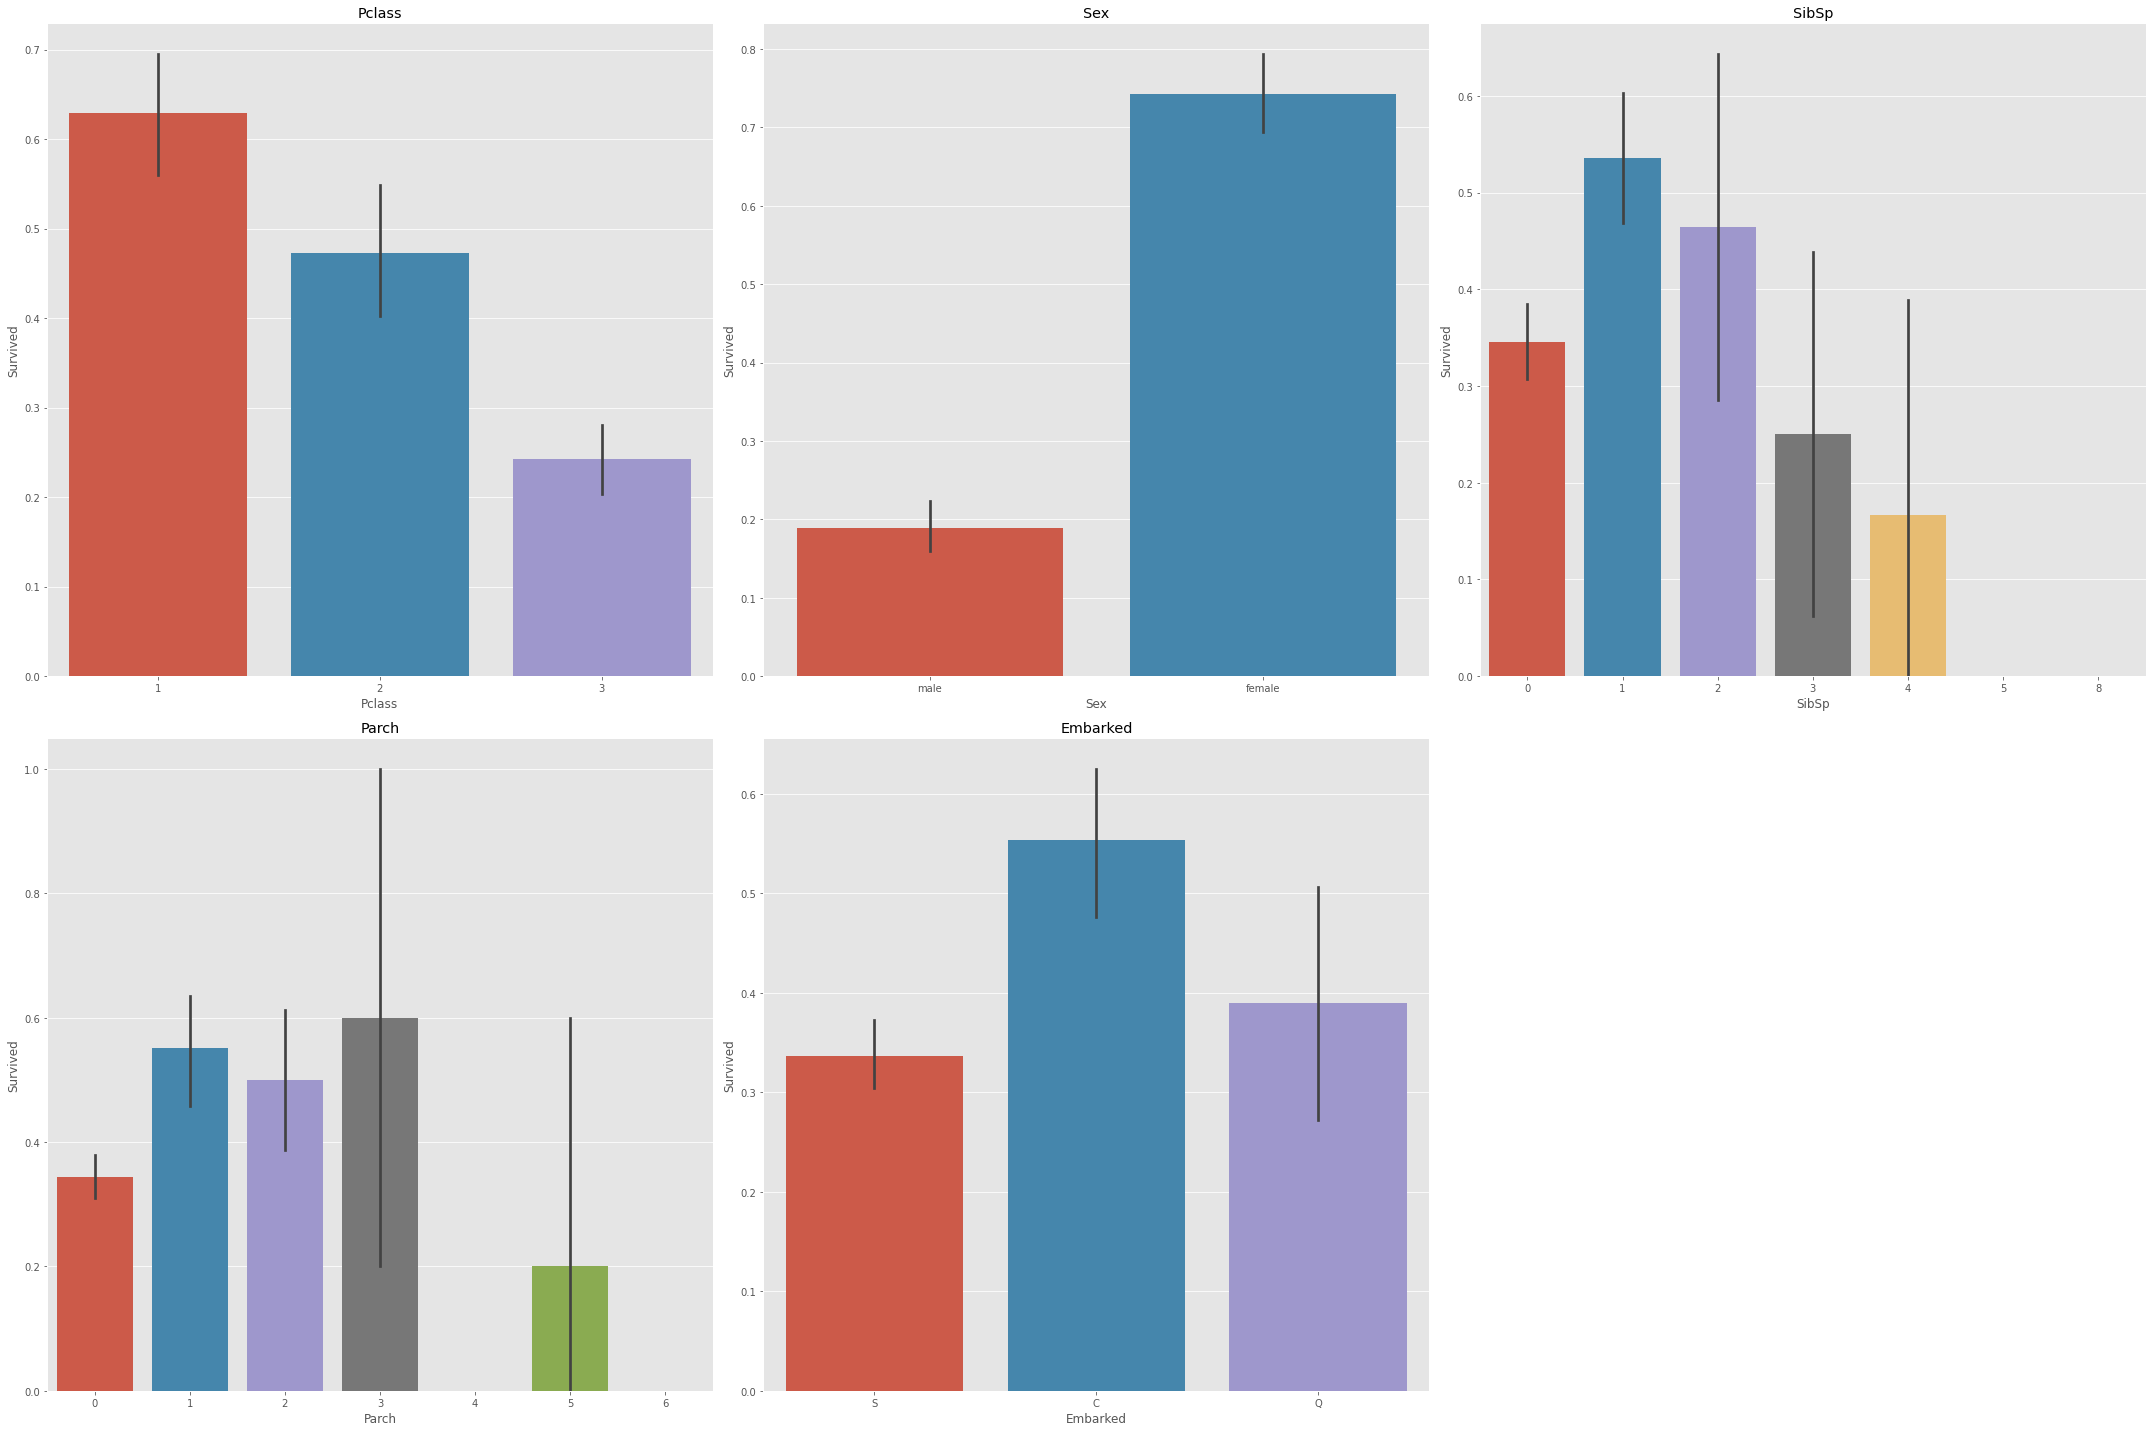

In [16]:
fig,axList = plt.subplots(nrows = 2, ncols = 3)
axList = axList.flatten()
cols = ['Pclass','Sex','SibSp','Parch','Embarked']
fig.set_size_inches(30, 20)

axList[-1].axis('off')

for ax,col in zip(axList,cols):
    sns.barplot(x=col , y="Survived", data=train_set, ax=ax)
    ax.set(title=col)
plt.tight_layout()

In [17]:
df = pd.DataFrame({'count':train_set.groupby('Pclass')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('Pclass')['Survived'].value_counts(normalize=True)})
df

count  Percentage
Pclass Survived                   
1      1           136    0.629630
       0            80    0.370370
2      0            97    0.527174
       1            87    0.472826
3      0           372    0.757637
       1           119    0.242363

Percentage of survivors with first class 0.629630

Percentage of survivors with second class 0.472826

Percentage of survivors with third class 0.242363

In [18]:
df = pd.DataFrame({'count':train_set.groupby('Sex')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('Sex')['Survived'].value_counts(normalize=True)})
df

count  Percentage
Sex    Survived                   
female 1           233    0.742038
       0            81    0.257962
male   0           468    0.811092
       1           109    0.188908

Percentage of male survivors 0.188908

Percentage of female survivors 0.742038

In [19]:
df = pd.DataFrame({'count':train_set.groupby('SibSp')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('SibSp')['Survived'].value_counts(normalize=True)})
df

count  Percentage
SibSp Survived                   
0     0           398    0.654605
      1           210    0.345395
1     1           112    0.535885
      0            97    0.464115
2     0            15    0.535714
      1            13    0.464286
3     0            12    0.750000
      1             4    0.250000
4     0            15    0.833333
      1             3    0.166667
5     0             5    1.000000
8     0             7    1.000000

In [20]:
df = pd.DataFrame({'count':train_set.groupby('Parch')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('Parch')['Survived'].value_counts(normalize=True)})
df

count  Percentage
Parch Survived                   
0     0           445    0.656342
      1           233    0.343658
1     1            65    0.550847
      0            53    0.449153
2     0            40    0.500000
      1            40    0.500000
3     1             3    0.600000
      0             2    0.400000
4     0             4    1.000000
5     0             4    0.800000
      1             1    0.200000
6     0             1    1.000000

In [21]:
df = pd.DataFrame({'count':train_set.groupby('Embarked')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('Embarked')['Survived'].value_counts(normalize=True)})
df

count  Percentage
Embarked Survived                   
C        1            93    0.553571
         0            75    0.446429
Q        0            47    0.610390
         1            30    0.389610
S        0           427    0.663043
         1           217    0.336957

Percentage of survivors who left  Cherbourg  port 0.553571

Percentage of survivors who left  Queenstown  port 0.389610

Percentage of survivors who left  Southampton  port 0.336957

In [22]:
#show Box Plot to see outlier 
def box_plot(df):
    fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize=(20,10))
    sns.boxplot(df['Fare'], ax=ax[0])
    sns.boxplot(df['Age'], ax=ax[1]);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


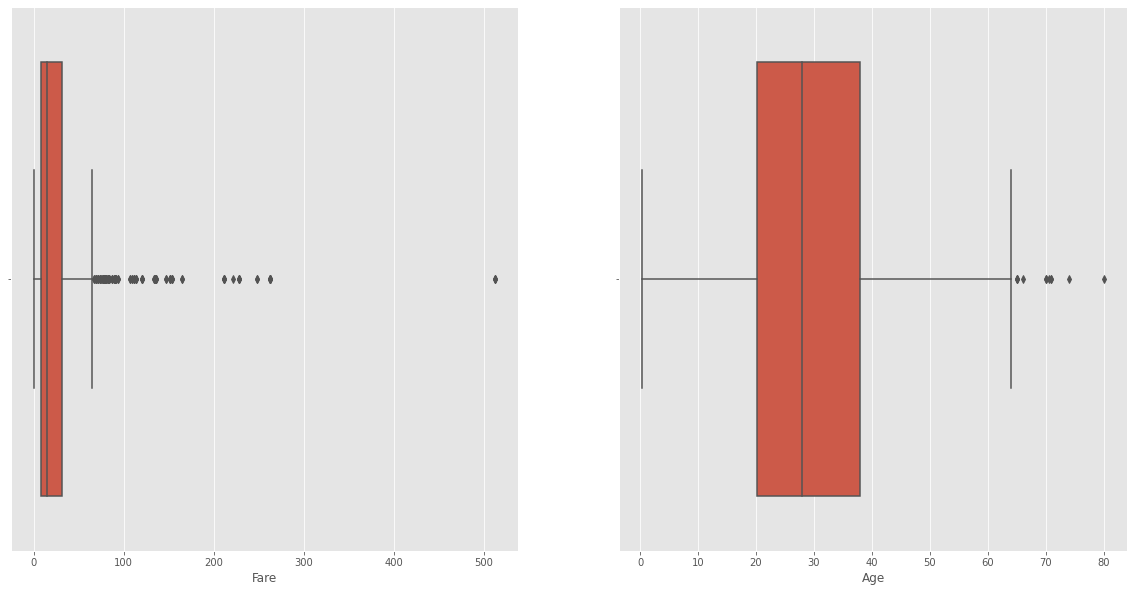

In [23]:
box_plot(train_set)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


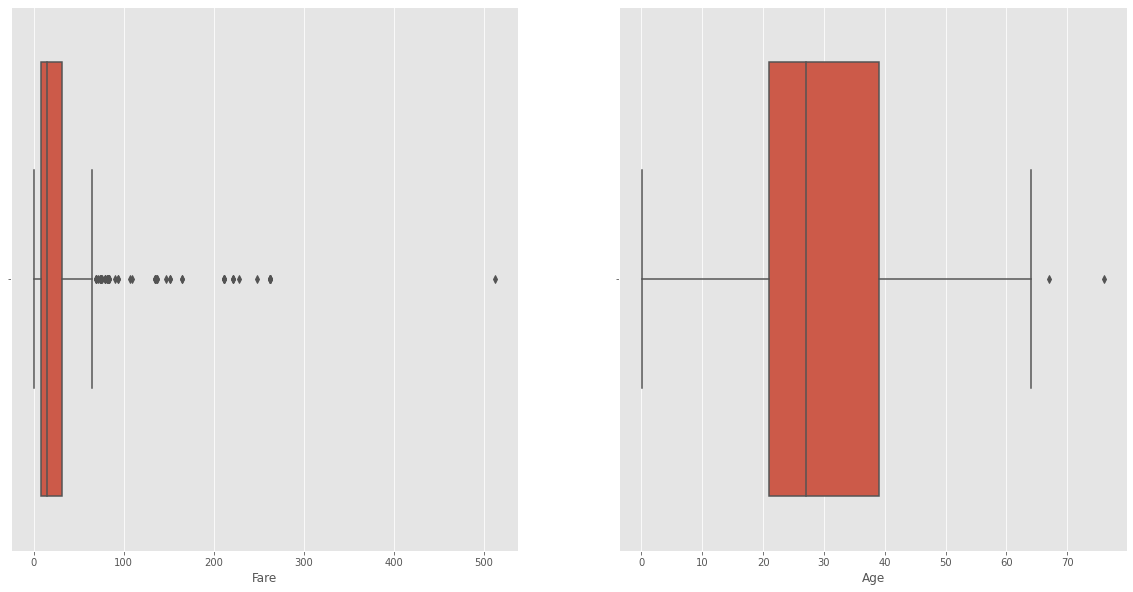

In [24]:
box_plot(test_set)

In [25]:
#for remove outlier in train_set and test
def remove_outlier(df): 
    
    lis = list()

    for col in ['Fare','Age']:
    
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
    
        iqr = q3 - q1
    
        max_limit = q3 + iqr*1.5
        min_limit = q1 - iqr*1.5
    
        outlier = [x for x in df[col] if x > max_limit or x < min_limit]
        lis.append(len(outlier))
    
        df[col] = df[col].replace(outlier,-1)
        df[col] = df[col].replace(-1,df[col].mean())
        
    # count and rario of outlier data in Fare and Age columns
    df_outlier = pd.DataFrame(lis,index=['Fare outlier','Age outlier'],columns=['count'])
    df_outlier['ratio'] = df_outlier['count']/len(train_set)  
    
    return df_outlier
            

In [26]:
remove_outlier(train_set)

,count,ratio
Fare outlier,116,0.130191
Age outlier,11,0.012346


the ratio of outlier in Fare column 0.053872

the ratio of outlier in Age column 0.004489

In [27]:
remove_outlier(test_set)

,count,ratio
Fare outlier,55,0.061728
Age outlier,2,0.002245


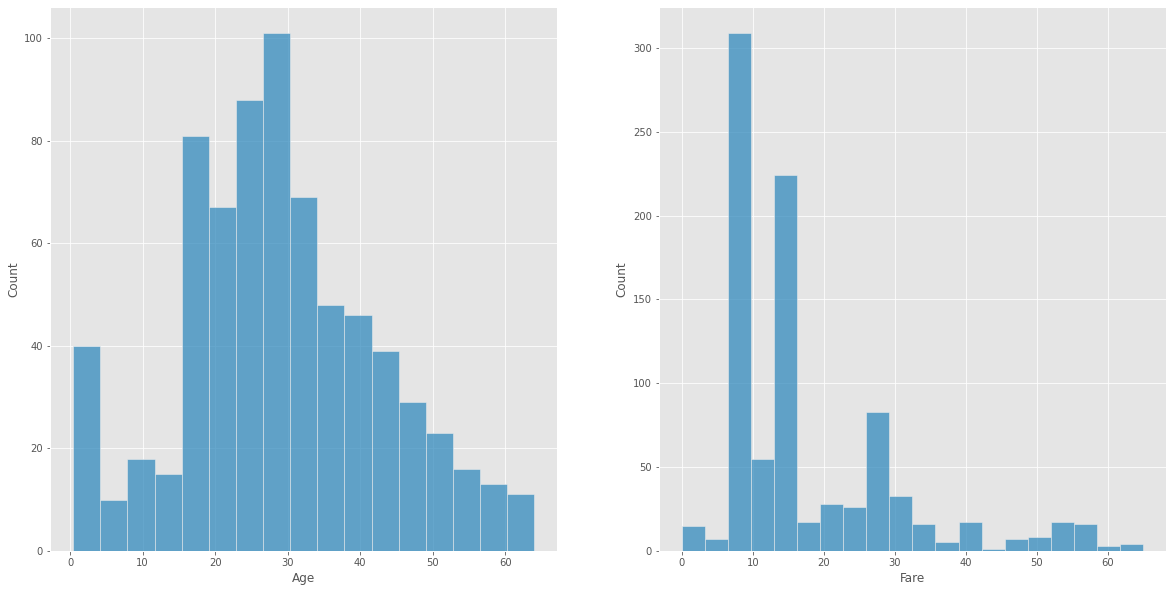

In [28]:
#show Age and Fare distribution
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize=(20,10))
sns.histplot(train_set['Age'], ax=ax[0])
sns.histplot(train_set['Fare'], ax=ax[1]);

In [29]:
train_set[['Age','Fare']].skew().to_frame(name='skewness')

,skewness
Age,0.203746
Fare,1.598576


the skewness in Age is not big, but in Far is big 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


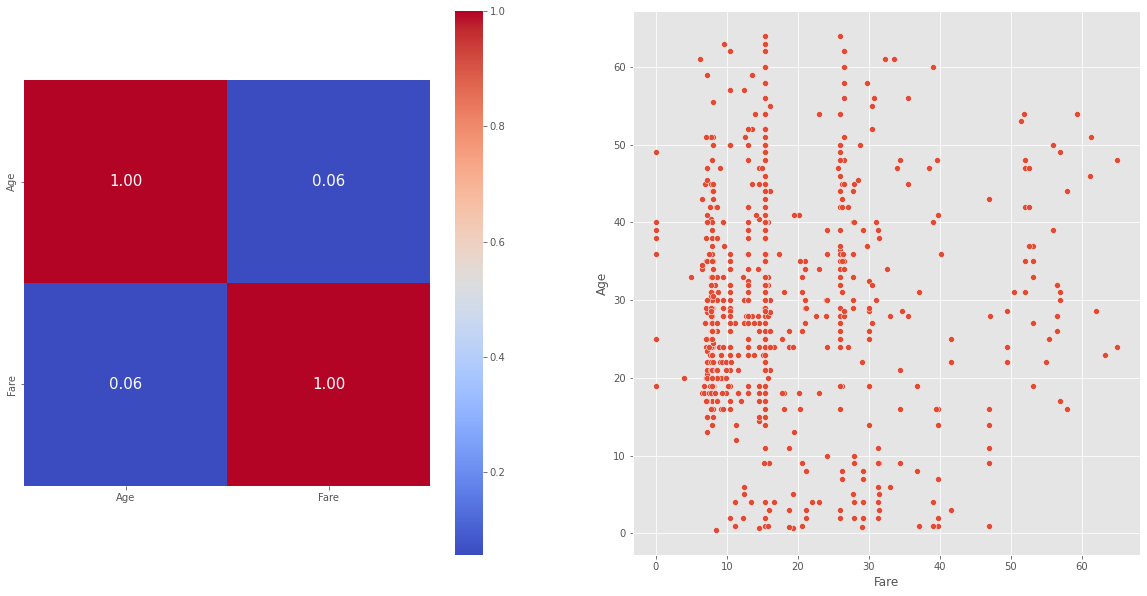

<Figure size 720x720 with 0 Axes>

In [30]:
corr = train_set[['Age','Fare']].corr()# .corr is used for find corelation
fig,ax = plt.subplots(1,2,figsize=(20,10))
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= ['Age','Fare'], yticklabels= ['Age','Fare'],cmap= 'coolwarm',ax=ax[0])
sns.scatterplot(train_set['Fare'],train_set['Age'],ax=ax[1]);

There is no linear correlation between age and Fare

# Data Preprocessing

In [31]:
#convert type of data from string to number 
# Sex column (male=0,female=1)
# Embarked column (C=1,S=2,Q=3)
train_set['Sex'] = train_set['Sex'].replace({'male': 0 , 'female': 1})
test_set['Sex'] = test_set['Sex'].replace({'male': 0 , 'female':1 })
train_set['Embarked'] = train_set['Embarked'].replace({'C': 1 , 'S': 2,'Q': 3})
test_set['Embarked'] = test_set['Embarked'].replace({'C': 1 , 'S': 2,'Q': 3})

In [32]:
#show missing values
nan_value = train_set.isnull().sum()
nan_value = nan_value[nan_value>0]
nan_value_df = pd.DataFrame(nan_value.values, index=nan_value.index, columns=['count'])
nan_value_df['ratio'] = nan_value_df['count']/len(train_set)
nan_value_df

,count,ratio
Age,177,0.198653
Cabin,687,0.771044
Embarked,2,0.002245


train_set

ratio of missing values in the age column 0.198653

ratio of missing values in the Cabin column 0.771044 (It's big)

ratio of missing values in the Embarked column 0.002245


In [33]:
nan_value1 = test_set.isnull().sum()
nan_value1 = nan_value1[nan_value1>0]
nan_value1_df = pd.DataFrame(nan_value1.values, index=nan_value1.index, columns=['count'])
nan_value1_df['ratio'] = nan_value1_df['count']/len(test_set)
nan_value1_df

,count,ratio
Age,86,0.205742
Fare,1,0.002392
Cabin,327,0.782297


test_set 

ratio of missing values in the age column 0.205742

ratio of missing values in the Cabin column0.782297 (It's big)

ratio of missing values in the Fare column 0.002392

In [34]:
train_set['Embarked'].fillna(train_set['Embarked'].mode().iloc[0],inplace=True)
test_set['Fare'].fillna(test_set['Fare'].mean(),inplace=True)

replace missing values to mode value in Embarked column

replace missing values to mean value in Fare column

In [35]:
train_set['Age'].fillna(train_set['Age'].mean(),inplace=True)
test_set['Age'].fillna(test_set['Age'].mean(),inplace=True)

replace missing values to mean value in Age value

these "Cabin","Name","PassengerId" and "Ticket" columns are not important for machine learning model, so we delete them

In [36]:
train_set.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)
test_set.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)

In [37]:
X_train_set = train_set.drop(['Survived'],axis=1)
Y_train_set = train_set['Survived']

I will merge train_set and test_set, because in test_set in Parch column we have  value 9, but in train_set we don't have this value.

if we implement pd.get_dummies(data,columns=['Pclass','SibSp','Parch','Embarked'], drop_first=True) in train_set and test_set Separately , they will be different 

I mean, it will appear Parch_9 column in test_set and It will not appear in train_set


In [38]:
data = pd.concat([X_train_set,test_set])

In [39]:
data = pd.get_dummies(data,columns=['Pclass','SibSp','Parch','Embarked'], drop_first=True)

In [40]:
data

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_2.0,Embarked_3.0
0,0,22.000000,7.250000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,38.000000,15.371628,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.000000,7.925000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,35.000000,53.100000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,35.000000,8.050000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,30.021601,8.050000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
414,1,39.000000,15.721243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,0,38.500000,7.250000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
416,0,30.021601,8.050000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
X_train_set = data.iloc[:891]
test_set = data.iloc[891:]

In [42]:
X_train = np.asarray(X_train_set)
y_train = np.asarray(Y_train_set)
X_test = np.asarray(test_set)
y_test = np.asarray(submission['Survived'])

In [43]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

K Nearest Neighbors model

In [44]:
KNN = KNeighborsClassifier().fit(X_train_scaler,y_train)
y_pred = KNN.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

0.8277511961722488

In [45]:
param_grid = {'n_neighbors':[x for x in range(20)]}

GV_KNN = GridSearchCV(KNeighborsClassifier(),
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_KNN.fit(X_train_scaler,y_train)
GV_KNN.best_estimator_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 566, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
ValueError: Expecte

KNeighborsClassifier()

In [46]:
y_pred = GV_KNN.predict(X_test_scaler)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       258
           1       0.79      0.75      0.77       160

    accuracy                           0.83       418
   macro avg       0.82      0.81      0.82       418
weighted avg       0.83      0.83      0.83       418



In [47]:
roc_auc_score(y_test,y_pred)

0.8195488721804511

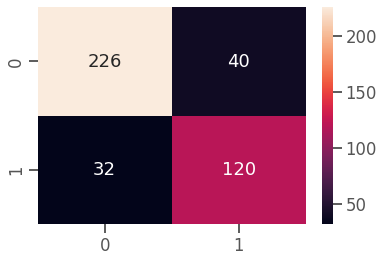

In [48]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Decision Tree model

In [49]:
DTC = DecisionTreeClassifier().fit(X_train_scaler,y_train)
y_pred = DTC.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

0.777511961722488

In [50]:
param_grid = {'max_depth':[x for x in range(20)],
              'min_samples_split':[x for x in range(2,100,10)],
              'max_features':[x for x in range(20)]}

GV_DT = GridSearchCV(DecisionTreeClassifier(),
                   param_grid=param_grid, 
                   scoring='accuracy',
                   n_jobs=-1)

GV_DT.fit(X_train_scaler,y_train)
GV_DT.best_estimator_              

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1950 fits failed out of a total of 20000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greate

DecisionTreeClassifier(max_depth=12, max_features=13, min_samples_split=12)

In [51]:
y_pred = GV_DT.predict(X_test_scaler)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       285
           1       0.75      0.86      0.80       133

    accuracy                           0.86       418
   macro avg       0.84      0.86      0.85       418
weighted avg       0.87      0.86      0.87       418



In [52]:
roc_auc_score(y_test,y_pred)

0.8392857142857143

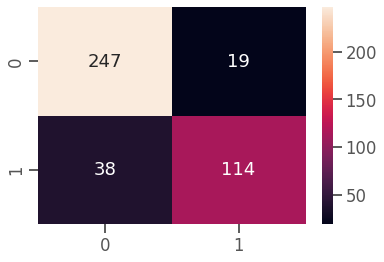

In [53]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Logistic Regression model

In [54]:
LR = LogisticRegression().fit(X_train_scaler,y_train)
y_pred = LR.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

0.9521531100478469

In [55]:
param_grid = {'penalty':['l1', 'l2', 'elasticnet'],
              'max_iter':[20,50,100,150,170,200]}
GV_LR = GridSearchCV(LogisticRegression(),
                     param_grid=param_grid,
                     scoring='accuracy',
                     n_jobs=-1)
GV_LR.fit(X_train_scaler,y_train)
GV_LR.best_estimator_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

LogisticRegression(max_iter=20)

In [56]:
y_pred = LR.predict(X_test_scaler)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       260
           1       0.95      0.92      0.94       158

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [57]:
roc_auc_score(y_test,y_pred)

0.9525375939849624

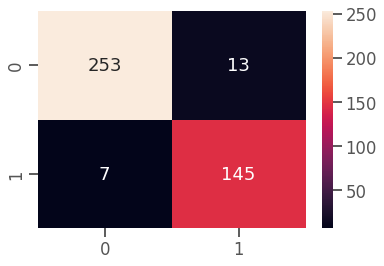

In [58]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Support Vector Machine model

In [59]:
SVM = SVC().fit(X_train_scaler,y_train)
y_pred = SVM.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

0.9497607655502392

In [60]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

GV_SVM = GridSearchCV(SVC(),
                     param_grid=param_grid,
                     scoring='accuracy',
                     n_jobs=-1)

GV_SVM.fit(X_train_scaler,y_train)
GV_SVM.best_estimator_

SVC(C=1000, gamma=0.001)

In [61]:
y_pred = GV_SVM.predict(X_test_scaler)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       267
           1       0.95      0.95      0.95       151

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [62]:
roc_auc_score(y_test,y_pred)

0.9605263157894737

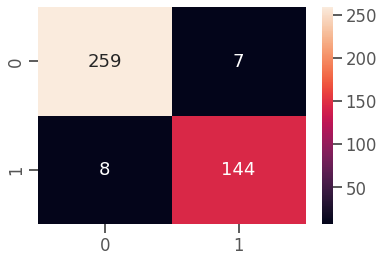

In [63]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Random Forest model

In [64]:
RF = RandomForestClassifier().fit(X_train_scaler,y_train)
y_pred = RF.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

0.7918660287081339

In [65]:
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]}
GV_RF = GridSearchCV(RandomForestClassifier(),
                     param_grid=param_grid,
                     scoring='accuracy',
                     n_jobs=-1)
GV_RF.fit(X_train_scaler,y_train)
GV_RF.best_estimator_

RandomForestClassifier(n_estimators=200)

In [66]:
y_pred = GV_RF.predict(X_test_scaler)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       266
           1       0.71      0.69      0.70       152

    accuracy                           0.79       418
   macro avg       0.77      0.77      0.77       418
weighted avg       0.79      0.79      0.79       418



In [67]:
roc_auc_score(y_test,y_pred)

0.7664473684210527

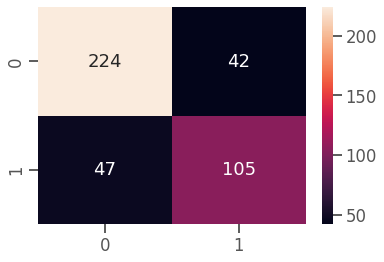

In [68]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

AdaBoost model

In [69]:
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)).fit(X_train_scaler,y_train)
y_pred = ABC.predict(X_test)
accuracy_score(y_test,y_pred)

0.3684210526315789

In [70]:
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100)

In [71]:
y_pred = GV_ABC.predict(X_test_scaler)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [72]:
roc_auc_score(y_test,y_pred)

1.0

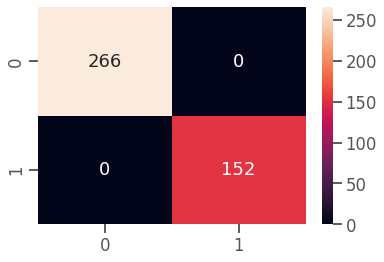

In [73]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Gradient Boosting model

In [74]:
GBC = GradientBoostingClassifier(random_state=42).fit(X_train_scaler,y_train)
y_pred = GBC.predict(X_test)
accuracy_score(y_test,y_pred)

0.507177033492823

In [75]:
param_grid = {'n_estimators': [15, 25, 50, 100, 200, 400],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}


GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)


GV_GBC.fit(X_train_scaler, y_train)
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=4, random_state=42, subsample=0.5)

In [76]:
y_pred = GV_GBC.predict(X_test_scaler)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       279
           1       0.82      0.89      0.85       139

    accuracy                           0.90       418
   macro avg       0.88      0.90      0.89       418
weighted avg       0.90      0.90      0.90       418



In [77]:
roc_auc_score(y_test,y_pred)

0.8796992481203008

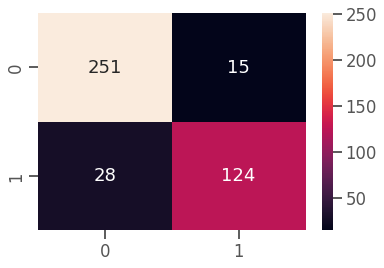

In [78]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [79]:
submission['Survived'] = GV_ABC.predict(X_test_scaler)

In [80]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
submission.to_csv('submission.csv',index=False)